In [16]:
import numpy as np
import cv2
np.random.seed(123) 
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten  
from keras.layers import Convolution2D, MaxPooling2D 

from keras.utils import np_utils

from keras.datasets import mnist
from google.colab.patches import cv2_imshow

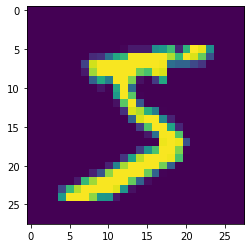

In [17]:
(X_train, y_train), (X_test, y_test) = mnist.load_data() 
plt.imshow(X_train[0])
plt.show()

In [18]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [19]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [20]:
X_train /= 255
X_test /= 255

In [21]:
Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

In [22]:
model = Sequential()

model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(28,28,1))) 
model.add(Convolution2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [23]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [24]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=1)

Epoch 1/10
1875/1875 [==============================] - 113s 60ms/step - loss: 0.2159 - accuracy: 0.9337
Epoch 2/10
1875/1875 [==============================] - 112s 60ms/step - loss: 0.0911 - accuracy: 0.9726
Epoch 3/10
1875/1875 [==============================] - 112s 60ms/step - loss: 0.0686 - accuracy: 0.9796
Epoch 4/10
1875/1875 [==============================] - 111s 59ms/step - loss: 0.0589 - accuracy: 0.9821
Epoch 5/10
1875/1875 [==============================] - 111s 59ms/step - loss: 0.0485 - accuracy: 0.9854
Epoch 6/10
1875/1875 [==============================] - 115s 62ms/step - loss: 0.0416 - accuracy: 0.9870
Epoch 7/10
1875/1875 [==============================] - 112s 60ms/step - loss: 0.0387 - accuracy: 0.9882
Epoch 8/10
1875/1875 [==============================] - 112s 60ms/step - loss: 0.0357 - accuracy: 0.9883
Epoch 9/10
1875/1875 [==============================] - 111s 59ms/step - loss: 0.0318 - accuracy: 0.9894
Epoch 10/10
1875/1875 [==============================] 

In [33]:
for i in np.random.choice(np.arange(0, len(Y_test)), size = (10,)):
	
	probs = model.predict(X_test[np.newaxis, i])
	prediction = probs.argmax(axis=1)
 
	image = (X_test[i] * 255).reshape((28, 28)).astype("uint8")
 
	print("Actual digit is {0}, predicted {1}".format(Y_test[i], prediction[0]))
	cv2_imshow(image)
	cv2.waitKey(0) 

Actual digit is [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.], predicted 4


Actual digit is [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.], predicted 2


Actual digit is [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.], predicted 1


Actual digit is [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.], predicted 7


Actual digit is [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.], predicted 4


Actual digit is [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.], predicted 0


Actual digit is [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.], predicted 4


Actual digit is [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.], predicted 4


Actual digit is [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.], predicted 7


Actual digit is [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.], predicted 3
